<h1><center>DBSCAN - Image Segmentation (Clustering)</center></h1>

In [1]:
from sklearn.cluster import DBSCAN

from matplotlib.image import imread

import numpy as np
import matplotlib.pyplot as plt

In [2]:
img_filename = "./textile/textile_1.PNG"
image = imread(img_filename)
print('Original Image Shape: ', image.shape)

Original Image Shape:  (645, 656, 4)


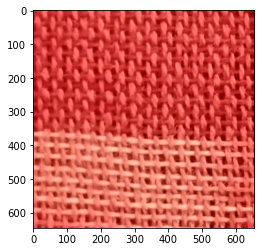

In [3]:
plt.imshow(image)

In [4]:
X = image.reshape(-1, 4)

In [5]:
X.shape

(423120, 4)

In [6]:
dbscan = DBSCAN(eps=0.005, min_samples=500)
dbscan.fit(X)

DBSCAN(eps=0.005, min_samples=500)

In [7]:
len(dbscan.core_sample_indices_)

121031

In [8]:
len(dbscan.labels_)

423120

In [6]:
unuque_labels = np.unique(dbscan.labels_)
print('Unique Lables: ', unuque_labels)

Unique Lables:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [7]:
np.argwhere(dbscan.labels_ == -1)

array([[    23],
       [    24],
       [    25],
       ...,
       [423117],
       [423118],
       [423119]], dtype=int64)

In [11]:
for label in unuque_labels:
    first_idx_of_lable = np.min(np.argwhere(dbscan.labels_ == label))
    print('First Index of label - \'{0}\' in X is - {1}'.format(label, first_idx_of_lable) )
    print('Pixels to replace labels with \'{0}\' recored is - {1} '.format(label, X[first_idx_of_lable]) )
    X[dbscan.labels_ == label] = X[first_idx_of_lable]

First Index of label - '-1' in X is - 23
Pixels to replace labels with '-1' recored is - [0.8745098  0.26666668 0.2627451  1.        ] 
First Index of label - '0' in X is - 0
Pixels to replace labels with '0' recored is - [0.81960785 0.21568628 0.20784314 1.        ] 
First Index of label - '1' in X is - 29
Pixels to replace labels with '1' recored is - [0.972549   0.38039216 0.36862746 1.        ] 
First Index of label - '2' in X is - 748
Pixels to replace labels with '2' recored is - [0.65882355 0.08235294 0.07450981 1.        ] 
First Index of label - '3' in X is - 133
Pixels to replace labels with '3' recored is - [0.6392157  0.07450981 0.0627451  1.        ] 
First Index of label - '4' in X is - 1913
Pixels to replace labels with '4' recored is - [0.627451   0.06666667 0.04705882 1.        ] 
First Index of label - '5' in X is - 781
Pixels to replace labels with '5' recored is - [1.         0.49803922 0.4745098  1.        ] 
First Index of label - '6' in X is - 2576
Pixels to repl

In [12]:
segmented_img = X.reshape(image.shape)

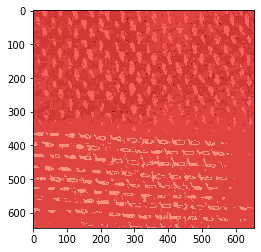

In [14]:
#plt.figure(figsize=(10,10))
plt.imshow(segmented_img)
plt.savefig('./segmented/'+img_filename+'_'+str(0.005)+'_'+str(500)+'.png')

Original Image Shape: (645, 656, 4)
 Training -  0.005 _ 400  Begin
 Training -  0.005 _ 400  END
Unique Labels:  [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
First Index of label - '-1' in X is - 23
Pixels to replace labels with '-1' recored is - [0.8745098  0.26666668 0.2627451  1.        ] 
First Index of label - '0' in X is - 0
Pixels to replace labels with '0' recored is - [0.81960785 0.21568628 0.20784314 1.        ] 
First Index of label - '1' in X is - 125
Pixels to replace labels with '1' recored is - [1.         0.5058824  0.48235294 1.        ] 
First Index of label - '2' in X is - 180
Pixels to replace labels with '2' recored is - [0.8117647  0.23529412 0.21568628 1.        ] 
First Index of label - '3' in X is - 282
Pixels to replace labels with '3' recored is - [0.7294118  0.14509805 0.14509805 1.        ] 
First Index of label - '4' in X is - 1149
Pixels to replace labels with '4' recored is - 

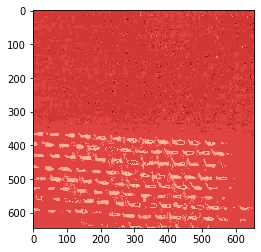

In [26]:
img_filename = "textile/textile_1.PNG"
image = imread(img_filename)
print("Original Image Shape:", image.shape)

X = image.reshape(-1, 4)

eps_lst = [0.005]
min_sample_lst = [400]

for eps in eps_lst:
    for min_sample in min_sample_lst:
        print(" Training - ", eps, "_", min_sample, " Begin")
        dbscan = DBSCAN(eps=eps, min_samples=min_sample, algorithm='ball_tree')
        labels = dbscan.fit_predict(X)
        print(" Training - ", eps, "_", min_sample, " END")
        
        unique_labels = np.unique(labels)
        print('Unique Labels: ', unique_labels)
        
        for label in unuque_labels:
            first_idx_of_lable = np.min(np.argwhere(dbscan.labels_ == label))
            print('First Index of label - \'{0}\' in X is - {1}'.format(label, first_idx_of_lable) )
            print('Pixels to replace labels with \'{0}\' recored is - {1} '.format(label, X[first_idx_of_lable]) )
            X[dbscan.labels_ == label] = X[first_idx_of_lable]
        
        segmented_img = X.reshape(image.shape)
        plt.imshow(segmented_img)
        plt.savefig('./segmented/dbscan_'+img_filename+'_'+str(eps)+'_'+str(min_sample)+'.png')

Original Image Shape: (516, 531, 4)
 Training -  0.005 _ 5  Begin
 Training -  0.005 _ 5  END
Unique Labels:  [  -1    0    1 ... 1890 1891 1892]
-1
First Index of label - '-1' in X is - 39
Pixels to replace labels with '-1' recored is - [0.09411765 0.32156864 0.43137255 1.        ] 
0
First Index of label - '0' in X is - 0
Pixels to replace labels with '0' recored is - [0.         0.6745098  0.73333335 1.        ] 
1
First Index of label - '1' in X is - 95
Pixels to replace labels with '1' recored is - [0.01176471 0.40784314 0.5137255  1.        ] 
2
First Index of label - '2' in X is - 218
Pixels to replace labels with '2' recored is - [0.30588236 0.4862745  0.5686275  1.        ] 
3
First Index of label - '3' in X is - 219
Pixels to replace labels with '3' recored is - [0.28235295 0.47058824 0.54901963 1.        ] 
4
First Index of label - '4' in X is - 220
Pixels to replace labels with '4' recored is - [0.28627452 0.4745098  0.5529412  1.        ] 
5
First Index of label - '5' in X

146
First Index of label - '146' in X is - 2563
Pixels to replace labels with '146' recored is - [0.08235294 0.5882353  0.6784314  1.        ] 
147
First Index of label - '147' in X is - 6736
Pixels to replace labels with '147' recored is - [0.10196079 0.6784314  0.7647059  1.        ] 
148
First Index of label - '148' in X is - 6738
Pixels to replace labels with '148' recored is - [0.29411766 0.5372549  0.60784316 1.        ] 
149
First Index of label - '149' in X is - 6789
Pixels to replace labels with '149' recored is - [0.03137255 0.654902   0.72156864 1.        ] 
150
First Index of label - '150' in X is - 4543
Pixels to replace labels with '150' recored is - [0.10980392 0.4509804  0.50980395 1.        ] 
151
First Index of label - '151' in X is - 6865
Pixels to replace labels with '151' recored is - [0.03529412 0.4392157  0.5294118  1.        ] 
152
First Index of label - '152' in X is - 6920
Pixels to replace labels with '152' recored is - [0.03921569 0.14117648 0.23137255 1.   

274
First Index of label - '274' in X is - 13150
Pixels to replace labels with '274' recored is - [0.10980392 0.3764706  0.42352942 1.        ] 
275
First Index of label - '275' in X is - 6229
Pixels to replace labels with '275' recored is - [0.16470589 0.4745098  0.5372549  1.        ] 
276
First Index of label - '276' in X is - 13353
Pixels to replace labels with '276' recored is - [0.02745098 0.5686275  0.6313726  1.        ] 
277
First Index of label - '277' in X is - 13617
Pixels to replace labels with '277' recored is - [0.00784314 0.27450982 0.3254902  1.        ] 
278
First Index of label - '278' in X is - 13639
Pixels to replace labels with '278' recored is - [0.14901961 0.41568628 0.5058824  1.        ] 
279
First Index of label - '279' in X is - 13824
Pixels to replace labels with '279' recored is - [0.21176471 0.5294118  0.59607846 1.        ] 
280
First Index of label - '280' in X is - 13827
Pixels to replace labels with '280' recored is - [0.14117648 0.46666667 0.5411765 

First Index of label - '403' in X is - 22667
Pixels to replace labels with '403' recored is - [0.30980393 0.5019608  0.58431375 1.        ] 
404
First Index of label - '404' in X is - 24180
Pixels to replace labels with '404' recored is - [0.01568628 0.7490196  0.84313726 1.        ] 
405
First Index of label - '405' in X is - 24183
Pixels to replace labels with '405' recored is - [0.13725491 0.5058824  0.6039216  1.        ] 
406
First Index of label - '406' in X is - 24211
Pixels to replace labels with '406' recored is - [0.21568628 0.5254902  0.6156863  1.        ] 
407
First Index of label - '407' in X is - 24213
Pixels to replace labels with '407' recored is - [0.14901961 0.5921569  0.6784314  1.        ] 
408
First Index of label - '408' in X is - 24214
Pixels to replace labels with '408' recored is - [0.1254902  0.62352943 0.7019608  1.        ] 
409
First Index of label - '409' in X is - 24236
Pixels to replace labels with '409' recored is - [0.13333334 0.6627451  0.7490196  1.

First Index of label - '538' in X is - 34919
Pixels to replace labels with '538' recored is - [0.08627451 0.44705883 0.5294118  1.        ] 
539
First Index of label - '539' in X is - 17533
Pixels to replace labels with '539' recored is - [0.1764706 0.5058824 0.5686275 1.       ] 
540
First Index of label - '540' in X is - 22049
Pixels to replace labels with '540' recored is - [0.20392157 0.52156866 0.58431375 1.        ] 
541
First Index of label - '541' in X is - 7238
Pixels to replace labels with '541' recored is - [0.1764706 0.5686275 0.6745098 1.       ] 
542
First Index of label - '542' in X is - 23757
Pixels to replace labels with '542' recored is - [0.09803922 0.7176471  0.78039217 1.        ] 
543
First Index of label - '543' in X is - 35025
Pixels to replace labels with '543' recored is - [0.04705882 0.70980394 0.76862746 1.        ] 
544
First Index of label - '544' in X is - 31777
Pixels to replace labels with '544' recored is - [0.02745098 0.42352942 0.5254902  1.        ]

667
First Index of label - '667' in X is - 47824
Pixels to replace labels with '667' recored is - [0.12156863 0.5058824  0.6        1.        ] 
668
First Index of label - '668' in X is - 31829
Pixels to replace labels with '668' recored is - [0.17254902 0.52156866 0.6039216  1.        ] 
669
First Index of label - '669' in X is - 47984
Pixels to replace labels with '669' recored is - [0.0627451 0.6862745 0.7529412 1.       ] 
670
First Index of label - '670' in X is - 47999
Pixels to replace labels with '670' recored is - [0.10980392 0.07843138 0.12941177 1.        ] 
671
First Index of label - '671' in X is - 48273
Pixels to replace labels with '671' recored is - [0.21960784 0.41960785 0.5137255  1.        ] 
672
First Index of label - '672' in X is - 17498
Pixels to replace labels with '672' recored is - [0.03137255 0.5529412  0.6666667  1.        ] 
673
First Index of label - '673' in X is - 30889
Pixels to replace labels with '673' recored is - [0.13333334 0.49411765 0.5686275  1.

First Index of label - '797' in X is - 66376
Pixels to replace labels with '797' recored is - [0.07843138 0.61960787 0.7019608  1.        ] 
798
First Index of label - '798' in X is - 11281
Pixels to replace labels with '798' recored is - [0.07058824 0.7411765  0.83137256 1.        ] 
799
First Index of label - '799' in X is - 4021
Pixels to replace labels with '799' recored is - [0.27450982 0.4862745  0.5529412  1.        ] 
800
First Index of label - '800' in X is - 66755
Pixels to replace labels with '800' recored is - [0.23921569 0.49411765 0.5803922  1.        ] 
801
First Index of label - '801' in X is - 28516
Pixels to replace labels with '801' recored is - [0.11764706 0.6313726  0.70980394 1.        ] 
802
First Index of label - '802' in X is - 66919
Pixels to replace labels with '802' recored is - [0.09019608 0.70980394 0.8        1.        ] 
803
First Index of label - '803' in X is - 67119
Pixels to replace labels with '803' recored is - [0.2509804 0.4509804 0.5176471 1.    

930
First Index of label - '930' in X is - 13954
Pixels to replace labels with '930' recored is - [0.09019608 0.5137255  0.6156863  1.        ] 
931
First Index of label - '931' in X is - 85724
Pixels to replace labels with '931' recored is - [0.02352941 0.30980393 0.36078432 1.        ] 
932
First Index of label - '932' in X is - 85859
Pixels to replace labels with '932' recored is - [0.03137255 0.45882353 0.50980395 1.        ] 
933
First Index of label - '933' in X is - 14151
Pixels to replace labels with '933' recored is - [0.01176471 0.25882354 0.34117648 1.        ] 
934
First Index of label - '934' in X is - 5854
Pixels to replace labels with '934' recored is - [0.         0.2901961  0.36862746 1.        ] 
935
First Index of label - '935' in X is - 86275
Pixels to replace labels with '935' recored is - [0.01568628 0.14901961 0.21176471 1.        ] 
936
First Index of label - '936' in X is - 86402
Pixels to replace labels with '936' recored is - [0.21176471 0.68235296 0.72156864

Pixels to replace labels with '1057' recored is - [0.10980392 0.60784316 0.69411767 1.        ] 
1058
First Index of label - '1058' in X is - 99342
Pixels to replace labels with '1058' recored is - [0.02745098 0.54901963 0.6039216  1.        ] 
1059
First Index of label - '1059' in X is - 4115
Pixels to replace labels with '1059' recored is - [0.03529412 0.5764706  0.61960787 1.        ] 
1060
First Index of label - '1060' in X is - 42193
Pixels to replace labels with '1060' recored is - [0.05490196 0.5372549  0.59607846 1.        ] 
1061
First Index of label - '1061' in X is - 43315
Pixels to replace labels with '1061' recored is - [0.19607843 0.6901961  0.78431374 1.        ] 
1062
First Index of label - '1062' in X is - 82902
Pixels to replace labels with '1062' recored is - [0.04313726 0.5019608  0.5764706  1.        ] 
1063
First Index of label - '1063' in X is - 98286
Pixels to replace labels with '1063' recored is - [0.05490196 0.60784316 0.654902   1.        ] 
1064
First Index

Pixels to replace labels with '1191' recored is - [0.        0.6156863 0.6156863 1.       ] 
1192
First Index of label - '1192' in X is - 118780
Pixels to replace labels with '1192' recored is - [0.0627451  0.2627451  0.36078432 1.        ] 
1193
First Index of label - '1193' in X is - 112265
Pixels to replace labels with '1193' recored is - [0.14509805 0.4509804  0.53333336 1.        ] 
1194
First Index of label - '1194' in X is - 60290
Pixels to replace labels with '1194' recored is - [0.19607843 0.46666667 0.5647059  1.        ] 
1195
First Index of label - '1195' in X is - 84243
Pixels to replace labels with '1195' recored is - [0.25490198 0.50980395 0.5921569  1.        ] 
1196
First Index of label - '1196' in X is - 111389
Pixels to replace labels with '1196' recored is - [0.04705882 0.2509804  0.30980393 1.        ] 
1197
First Index of label - '1197' in X is - 119275
Pixels to replace labels with '1197' recored is - [0.         0.6509804  0.64705884 1.        ] 
1198
First Inde

Pixels to replace labels with '1319' recored is - [0.12156863 0.6431373  0.7294118  1.        ] 
1320
First Index of label - '1320' in X is - 71422
Pixels to replace labels with '1320' recored is - [0.23137255 0.32156864 0.4117647  1.        ] 
1321
First Index of label - '1321' in X is - 143161
Pixels to replace labels with '1321' recored is - [0.2901961 0.3764706 0.4627451 1.       ] 
1322
First Index of label - '1322' in X is - 114058
Pixels to replace labels with '1322' recored is - [0.18431373 0.3647059  0.45490196 1.        ] 
1323
First Index of label - '1323' in X is - 79796
Pixels to replace labels with '1323' recored is - [0.21568628 0.5137255  0.6039216  1.        ] 
1324
First Index of label - '1324' in X is - 143338
Pixels to replace labels with '1324' recored is - [0.16470589 0.4509804  0.54509807 1.        ] 
1325
First Index of label - '1325' in X is - 28740
Pixels to replace labels with '1325' recored is - [0.11372549 0.41960785 0.5137255  1.        ] 
1326
First Index

First Index of label - '1448' in X is - 57620
Pixels to replace labels with '1448' recored is - [0.09411765 0.6784314  0.7529412  1.        ] 
1449
First Index of label - '1449' in X is - 138422
Pixels to replace labels with '1449' recored is - [0.10980392 0.5529412  0.61960787 1.        ] 
1450
First Index of label - '1450' in X is - 116638
Pixels to replace labels with '1450' recored is - [0.04313726 0.35686275 0.4509804  1.        ] 
1451
First Index of label - '1451' in X is - 98502
Pixels to replace labels with '1451' recored is - [0.21568628 0.3882353  0.44313726 1.        ] 
1452
First Index of label - '1452' in X is - 165465
Pixels to replace labels with '1452' recored is - [0.14901961 0.6862745  0.74509805 1.        ] 
1453
First Index of label - '1453' in X is - 76043
Pixels to replace labels with '1453' recored is - [0.44313726 0.5647059  0.63529414 1.        ] 
1454
First Index of label - '1454' in X is - 32362
Pixels to replace labels with '1454' recored is - [0.11764706 0

First Index of label - '1580' in X is - 83189
Pixels to replace labels with '1580' recored is - [0.14117648 0.52156866 0.6        1.        ] 
1581
First Index of label - '1581' in X is - 100450
Pixels to replace labels with '1581' recored is - [0.13725491 0.5803922  0.6666667  1.        ] 
1582
First Index of label - '1582' in X is - 118325
Pixels to replace labels with '1582' recored is - [0.20392157 0.57254905 0.65882355 1.        ] 
1583
First Index of label - '1583' in X is - 130032
Pixels to replace labels with '1583' recored is - [0.16078432 0.42352942 0.47843137 1.        ] 
1584
First Index of label - '1584' in X is - 43139
Pixels to replace labels with '1584' recored is - [0.13725491 0.4745098  0.57254905 1.        ] 
1585
First Index of label - '1585' in X is - 32297
Pixels to replace labels with '1585' recored is - [0.05882353 0.59607846 0.69411767 1.        ] 
1586
First Index of label - '1586' in X is - 100758
Pixels to replace labels with '1586' recored is - [0.05882353 

First Index of label - '1711' in X is - 31780
Pixels to replace labels with '1711' recored is - [0.03529412 0.4627451  0.5529412  1.        ] 
1712
First Index of label - '1712' in X is - 95727
Pixels to replace labels with '1712' recored is - [0.1254902  0.50980395 0.5568628  1.        ] 
1713
First Index of label - '1713' in X is - 79991
Pixels to replace labels with '1713' recored is - [0.10196079 0.42745098 0.50980395 1.        ] 
1714
First Index of label - '1714' in X is - 101474
Pixels to replace labels with '1714' recored is - [0.03137255 0.5647059  0.6039216  1.        ] 
1715
First Index of label - '1715' in X is - 89071
Pixels to replace labels with '1715' recored is - [0.04313726 0.60784316 0.63529414 1.        ] 
1716
First Index of label - '1716' in X is - 35190
Pixels to replace labels with '1716' recored is - [0.2        0.39215687 0.47058824 1.        ] 
1717
First Index of label - '1717' in X is - 201302
Pixels to replace labels with '1717' recored is - [0.07843138 0.

Pixels to replace labels with '1837' recored is - [0.02745098 0.627451   0.73333335 1.        ] 
1838
First Index of label - '1838' in X is - 7180
Pixels to replace labels with '1838' recored is - [0.32156864 0.43529412 0.52156866 1.        ] 
1839
First Index of label - '1839' in X is - 65445
Pixels to replace labels with '1839' recored is - [0.2        0.16862746 0.21176471 1.        ] 
1840
First Index of label - '1840' in X is - 91598
Pixels to replace labels with '1840' recored is - [0.2       0.5568628 0.627451  1.       ] 
1841
First Index of label - '1841' in X is - 77139
Pixels to replace labels with '1841' recored is - [0.12156863 0.24705882 0.34901962 1.        ] 
1842
First Index of label - '1842' in X is - 76636
Pixels to replace labels with '1842' recored is - [0.11764706 0.30980393 0.41568628 1.        ] 
1843
First Index of label - '1843' in X is - 18672
Pixels to replace labels with '1843' recored is - [0.03137255 0.27450982 0.32156864 1.        ] 
1844
First Index of 

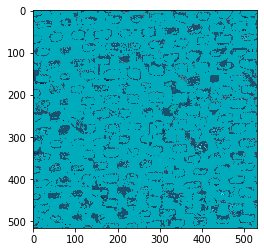

In [9]:
img_filename = "textile/textile_2.PNG"
image = imread(img_filename)
print("Original Image Shape:", image.shape)

X = image.reshape(-1, 4)

eps_lst = [0.005]
min_sample_lst = [5]

for eps in eps_lst:
    for min_sample in min_sample_lst:
        print(" Training - ", eps, "_", min_sample, " Begin")
        dbscan = DBSCAN(eps=eps, min_samples=min_sample, algorithm='ball_tree')
        labels = dbscan.fit_predict(X)
        print(" Training - ", eps, "_", min_sample, " END")
        
        unique_labels = np.unique(labels)
        print('Unique Labels: ', unique_labels)
        
        for label in unique_labels:
            print(label)
            first_idx_of_lable = np.min(np.argwhere(dbscan.labels_ == label))
            print('First Index of label - \'{0}\' in X is - {1}'.format(label, first_idx_of_lable) )
            print('Pixels to replace labels with \'{0}\' recored is - {1} '.format(label, X[first_idx_of_lable]) )
            X[dbscan.labels_ == label] = X[first_idx_of_lable]
        
        segmented_img = X.reshape(image.shape)
        plt.imshow(segmented_img)
        plt.savefig('./segmented/dbscan_'+img_filename+'_'+str(eps)+'_'+str(min_sample)+'.png')

### OPTICS for high-dimensional data

In [11]:
from sklearn.cluster import OPTICS

In [ ]:
img_filename = "textile/textile_3.PNG"
image = imread(img_filename)
print("Original Image Shape:", image.shape)

X = image.reshape(-1, 4)

eps_lst = [0.005]
min_sample_lst = [25, 30, 35, 40, 45, 50]

for eps in eps_lst:
    for min_sample in min_sample_lst:
        print(" Training - ", eps, "_", min_sample, " Begin")
        optics = OPTICS(max_eps=eps, min_samples=min_sample, metric='euclidean', cluster_method='dbscan', algorithm='ball_tree')
        labels = optics.fit_predict(X)
        print(" Training - ", eps, "_", min_sample, " END")
        
        unique_labels = np.unique(labels)
        print('Unique Labels: ', unique_labels)
        
        for label in unique_labels:
            print(label)
            first_idx_of_lable = np.min(np.argwhere(dbscan.labels_ == label))
            print('First Index of label - \'{0}\' in X is - {1}'.format(label, first_idx_of_lable) )
            print('Pixels to replace labels with \'{0}\' recored is - {1} '.format(label, X[first_idx_of_lable]) )
            X[optics.labels_ == label] = X[first_idx_of_lable]
        
        segmented_img = X.reshape(image.shape)
        plt.imshow(segmented_img)
        plt.savefig('./segmented/optics_'+img_filename+'_'+str(eps)+'_'+str(min_sample)+'.png')

Original Image Shape: (439, 461, 4)
 Training -  0.005 _ 25  Begin
 Training -  0.005 _ 25  END
Unique Labels:  [ -1   0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16
  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34
  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52
  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70
  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124
 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142
 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 180 181 182]
-1
First Index of label - '-1' in X is - 39
Pixels to replace labels with '-1' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
0

61
First Index of label - '61' in X is - 2560
Pixels to replace labels with '61' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
62
First Index of label - '62' in X is - 2697
Pixels to replace labels with '62' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
63
First Index of label - '63' in X is - 2756
Pixels to replace labels with '63' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
64
First Index of label - '64' in X is - 2757
Pixels to replace labels with '64' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
65
First Index of label - '65' in X is - 2759
Pixels to replace labels with '65' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
66
First Index of label - '66' in X is - 2826
Pixels to replace labels with '66' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
67
First Index of label - '67' in X is - 2836
Pixels to replace labels with '67' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
68
First Inde

First Index of label - '149' in X is - 6789
Pixels to replace labels with '149' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
150
First Index of label - '150' in X is - 4543
Pixels to replace labels with '150' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
151
First Index of label - '151' in X is - 6865
Pixels to replace labels with '151' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
152
First Index of label - '152' in X is - 6920
Pixels to replace labels with '152' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
153
First Index of label - '153' in X is - 7081
Pixels to replace labels with '153' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
154
First Index of label - '154' in X is - 3530
Pixels to replace labels with '154' recored is - [0.3882353  0.03137255 0.04313726 1.        ] 
155
First Index of label - '155' in X is - 7101
Pixels to replace labels with '155' recored is - [0.3882353  0.03137255 0.04313726 1.       